# **CNN Classification Test**

### **Load model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf

# Memuat model yang telah disimpan
model_path = '/content/drive/MyDrive/Capstone/model_fix.h5'
model = tf.keras.models.load_model(model_path)

# **Loading and Processing Input Images**

Saving pexels-photo-102104.jpeg to pexels-photo-102104.jpeg


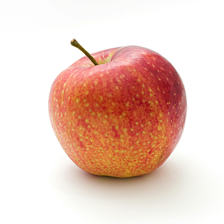

1/1 [==============================] - 0s 55ms/step
Predicted class: 0


In [17]:
# Unggah gambar dari sistem lokal ke Colab
uploaded = files.upload()

# Memuat gambar yang diunggah
for filename in uploaded.keys():
    img = Image.open(filename)
    img = img.resize((224, 224))  # Menyesuaikan ukuran gambar dengan yang diharapkan oleh model
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi nilai pixel (0-1)

    # Menampilkan gambar yang dimuat
    display(img)

    # Melakukan prediksi dengan model
    predictions = model.predict(img_array)

    # Mendapatkan label kelas dengan nilai tertinggi dari prediksi
    predicted_class = np.argmax(predictions, axis=1)

    # Menampilkan hasil prediksi
    print("Predicted class:", predicted_class[0])

In [18]:
# Inisialisasi konverter TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model ke format TFLite
tflite_model = converter.convert()

In [19]:
# Path untuk menyimpan model TFLite
tflite_model_path = '/content/drive/MyDrive/Capstone/model_fix50epochs.tflite'

# Menyimpan model TFLite ke file
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model TFLite berhasil disimpan di: {tflite_model_path}")

Model TFLite berhasil disimpan di: /content/drive/MyDrive/Capstone/model_fix50epochs.tflite
